In [ ]:
import torch, torchvision, time
import torchvision.transforms as transforms
import numpy as np
from numpy.random import seed
from numpy import transpose
from matplotlib import pyplot as plt
from warnings import filterwarnings as fw; fw("ignore")

In [ ]:
def imshow(img : torch.Tensor, *args, **kwargs) -> None:
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
EPOCH = 10
batch_size = 16
LEARNING_RATE = 3e-3

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(20), #between (-20, 20) degree
    torchvision.transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transform, download=True)

train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
print("Total TRAIN dataset: {}.\nFor mini-batch settings, there will be {} batches, with {} data for each batch." \
      .format(len(train_dataset), len(train_loader), batch_size))

Total TRAIN dataset: 50000.
For mini-batch settings, there will be 3125 batches, with 16 data for each batch.


In [ ]:
print("Total VALIDATION dataset: {}.\nFor mini-batch settings, there will be {} batches, with {} data for each batch." \
      .format(len(valid_dataset), len(valid_loader), batch_size))

Total VALIDATION dataset: 10000.
For mini-batch settings, there will be 625 batches, with 16 data for each batch.


In [ ]:
print("Total TEST dataset: {}.\nFor mini-batch settings, there will be {} batches, with {} data for each batch." \
      .format(len(test_dataset), len(test_loader), batch_size))

Total TEST dataset: 10000.
For mini-batch settings, there will be 625 batches, with 16 data for each batch.


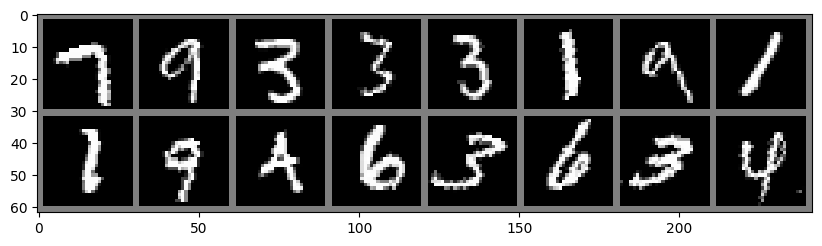

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(img=torchvision.utils.make_grid(images))

In [ ]:
class ADNet(torch.nn.Module):
    def __init__(self):
        super(ADNet, self).__init__()
        hidden_1 = 512
        hidden_2 = 512
        self.fc1 = torch.nn.Linear(28 * 28, hidden_1)
        self.fc2 = torch.nn.Linear(hidden_1, hidden_2)
        self.fc3 = torch.nn.Linear(hidden_2, 10)
        self.dropout = torch.nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = torch.nn.functional.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = torch.nn.functional.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x



In [ ]:
model = ADNet()
print(model)

ADNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
loss_function = torch.nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [ ]:
for epoch in range(EPOCH):

    train_loss = 0.0
    valid_loss = 0.0


    train_correct = 0
    valid_correct = 0
    train_total = 0
    valid_total = 0



    model.train()
    for data, target in train_loader:
          optimizer.zero_grad()
          output = model(data)
          loss = loss_function(output, target)
          loss.backward()
          # perform a single optimization step (parameter update)
          optimizer.step()
          # update running training loss
          train_loss += loss.item()*data.size(0)

          pred = output.argmax(1, keepdim=True)
          train_correct += pred.eq(target.view_as(pred)).sum().item()
          train_total += target.size(0)

    train_acc = train_correct / train_total

    model.eval()
    for data, target in valid_loader:
          # forward pass: compute predicted outputs by passing inputs to the model
          output = model(data)
          # calculate the loss
          loss = loss_function(output, target)
          # update running validation loss
          valid_loss += loss.item()*data.size(0)

          pred = output.argmax(1, keepdim=True)
          valid_correct += pred.eq(target.view_as(pred)).sum().item()
          valid_total += target.size(0)
          targets = target.tolist()

    valid_acc = valid_correct / valid_total
    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.3f} \tValidation Loss: {:.3f} \tTraining Accuracy: {:.2f} \tValidation Accuracy: {:.2f}'.format(
        epoch+1,
        train_loss,
        valid_loss,
        train_acc * 100,
        valid_acc * 100,
        ))


Epoch: 1 	Training Loss: 0.658 	Validation Loss: 0.472 	Training Accuracy: 79.56 	Validation Accuracy: 86.74
Epoch: 2 	Training Loss: 0.544 	Validation Loss: 0.350 	Training Accuracy: 84.12 	Validation Accuracy: 89.41
Epoch: 3 	Training Loss: 0.512 	Validation Loss: 0.365 	Training Accuracy: 85.30 	Validation Accuracy: 88.62
Epoch: 4 	Training Loss: 0.494 	Validation Loss: 0.344 	Training Accuracy: 85.95 	Validation Accuracy: 90.46
Epoch: 5 	Training Loss: 0.481 	Validation Loss: 0.304 	Training Accuracy: 86.55 	Validation Accuracy: 91.49
Epoch: 6 	Training Loss: 0.480 	Validation Loss: 0.313 	Training Accuracy: 86.59 	Validation Accuracy: 90.88
Epoch: 7 	Training Loss: 0.472 	Validation Loss: 0.292 	Training Accuracy: 86.81 	Validation Accuracy: 91.65
Epoch: 8 	Training Loss: 0.458 	Validation Loss: 0.357 	Training Accuracy: 87.30 	Validation Accuracy: 90.55
Epoch: 9 	Training Loss: 0.456 	Validation Loss: 0.301 	Training Accuracy: 87.34 	Validation Accuracy: 90.91
Epoch: 10 	Training